In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.vis_utils import plot_model
from warnings import filterwarnings
filterwarnings('ignore')
import os
import re
import string

In [2]:
# !pip install nltk
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swa

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_d

True

In [3]:
file="Reviews.csv"
import pandas as pd
data= pd.read_csv(file)
print(data.shape)

(334119, 31)


In [4]:
data.head()

,Unnamed: 0,ï»¿,uuid,createdAt,updatedAt,text,isAnonymous,reviewerName,reviewerId,ratings_overall,...,longitude,primary_cuisine,primary_cuisine_id,cuisines,review_number,restaurant_overall_rating,hero_image,hero_listing_image,vertical_type_ids,web_path
0,0,0,68e8f769-a0f0-460c-bfb9-16662fcc1e17,2023-11-02T06:48:08Z,2023-11-02T06:48:08Z,too much small amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
1,1,1,706a1e43-7475-4d7f-8488-cb8ed2ea8991,2023-10-27T07:35:53Z,2023-10-27T07:35:53Z,very small in amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
2,2,2,16cd99a3-7295-432e-b193-1551df62d255,2023-10-25T18:09:17Z,2023-10-25T18:09:17Z,food average but their desert booter halwa and...,False,SALMAN,bdjrt0zq,3,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
3,3,3,61a9fdf3-ad6b-4d23-9436-1f2f596bbcff,2023-10-25T07:48:39Z,2023-10-25T07:48:39Z,fresh and tasty,False,GOLAM,b6hrp8of,5,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
4,4,4,a7835cdf-2c1f-4cf0-b9d5-2777d904d746,2023-10-15T13:37:20Z,2023-10-15T13:37:20Z,everything i ordered was good,False,FERZANA,bddrkjrd,4,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334119 entries, 0 to 334118
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 334119 non-null  int64  
 1   ï»¿                        334119 non-null  int64  
 2   uuid                       334119 non-null  object 
 3   createdAt                  334119 non-null  object 
 4   updatedAt                  334119 non-null  object 
 5   text                       334119 non-null  object 
 6   isAnonymous                334119 non-null  bool   
 7   reviewerName               334119 non-null  object 
 8   reviewerId                 334119 non-null  object 
 9   ratings_overall            334119 non-null  int64  
 10  labels                     334119 non-null  int64  
 11  ratings                    334119 non-null  object 
 12  type                       334119 non-null  object 
 13  likeCount                  33

In [6]:
data.isnull().sum()

Unnamed: 0                   0
ï»¿                          0
uuid                         0
createdAt                    0
updatedAt                    0
text                         0
isAnonymous                  0
reviewerName                 0
reviewerId                   0
ratings_overall              0
labels                       0
ratings                      0
type                         0
likeCount                    0
isLiked                      0
code                         0
name                         0
address                      0
city                         0
post_code                    0
latitude                     0
longitude                    0
primary_cuisine              0
primary_cuisine_id           0
cuisines                     0
review_number                0
restaurant_overall_rating    0
hero_image                   0
hero_listing_image           0
vertical_type_ids            0
web_path                     0
dtype: int64

In [7]:
data.loc[1:10, ['text','reviewerName', 'ratings_overall','labels']]

,text,reviewerName,ratings_overall,labels
1,very small in amount,MOON,2,1
2,food average but their desert booter halwa and...,SALMAN,3,2
3,fresh and tasty,GOLAM,5,3
4,everything i ordered was good,FERZANA,4,3
5,kalo jira vhorta balu vhorta not recommended b...,FERZANA,1,1
6,quantity of dal should be little more otherwis...,FERZANA,4,3
7,beef was too poor in size quantity aganist pri...,DEDAR,3,2
8,chicken was not up to the mark and lotpoti was...,IFTEKHER,5,3
9,lot of sand in kali jeers bortha,MOHAMMAD,4,3
10,bad,MOHAMMAD,1,1


In [8]:
data['ratings_overall'].value_counts()

ratings_overall
1    127409
5     94199
4     39330
3     39315
2     33866
Name: count, dtype: int64

In [9]:
data['ratings_overall'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

In [10]:
data.iloc[0:16]['text']

0                                 too much small amount
1                                  very small in amount
2     food average but their desert booter halwa and...
3                                       fresh and tasty
4                         everything i ordered was good
5     kalo jira vhorta balu vhorta not recommended b...
6     quantity of dal should be little more otherwis...
7     beef was too poor in size quantity aganist pri...
8     chicken was not up to the mark and lotpoti was...
9                      lot of sand in kali jeers bortha
10                                                  bad
11    very good food i chose this home kitchen rando...
12    honestly eating today s beef ribs and dal felt...
13    i ate good food after a long time the food was...
14           really good clean tasting will order again
15                           too spicy with dry chilli 
Name: text, dtype: object

# Text preprocessing

In [11]:
def clean_text(text):
    text = text.lower()
    
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don t", "do not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"didn t", "did not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"won t", "will not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"isn t", "is not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"aren t", "are not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"wasn t", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"weren t", "were not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"haven t", "have not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hadn t", "had not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"couldn t", "could not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"shouldn t", "should not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"can t", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"it s", "it is", text)
    text = re.sub(r"kebab", "kabab", text)
    text = re.sub(r"nun", "naan", text)
    text = re.sub(r"nan", "naan", text)
    text = re.sub('[^a-zA-Z]'," ",text)
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text= re.sub('\s{2,}', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
#     print(text)
    text = "".join(text)
    return text

In [12]:
data['text']=data['text'].apply(clean_text)

In [13]:
data.iloc[0:16]['text']

0                                 too much small amount
1                                  very small in amount
2     food average but their desert booter halwa and...
3                                       fresh and tasty
4                         everything i ordered was good
5     kalo jira vhorta balu vhorta not recommended b...
6     quantity of dal should be little more otherwis...
7     beef was too poor in size quantity aganist pri...
8     chicken was not up to the mark and lotpoti was...
9                      lot of sand in kali jeers bortha
10                                                  bad
11    very good food i chose this home kitchen rando...
12    honestly eating today s beef ribs and dal felt...
13    i ate good food after a long time the food was...
14           really good clean tasting will order again
15                           too spicy with dry chilli 
Name: text, dtype: object

In [14]:
data.iloc[0]

Unnamed: 0                                                                   0
ï»¿                                                                          0
uuid                                      68e8f769-a0f0-460c-bfb9-16662fcc1e17
createdAt                                                 2023-11-02T06:48:08Z
updatedAt                                                 2023-11-02T06:48:08Z
text                                                     too much small amount
isAnonymous                                                              False
reviewerName                                                              MOON
reviewerId                                                            bdaclwhn
ratings_overall                                                              2
labels                                                                       1
ratings                      [{'topic': 'overall', 'score': 2}, {'topic': '...
type                                                

In [15]:
def get_summary(data):   

    content = data["text"].values        
    word_tok = [word.lower() for item in content for word in nltk.word_tokenize(item)]    
    st_words = set(word_tok)   
    
    fact = {
        "TotalCount": len(content),
        "TotalWords": len(word_tok),        
        "TotalUniqueWords": len(st_words),
        "MeanWordsPerTweet": len(word_tok) / len(content),
    }

    return fact, data.describe()

In [16]:
f, s = get_summary(data)
s

,Unnamed: 0,ï»¿,ratings_overall,labels,likeCount,latitude,longitude,primary_cuisine_id,review_number,restaurant_overall_rating
count,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000,334119.000000
mean,167059.000000,168411.559947,2.817562,1.916958,0.241884,23.668077,90.623229,127.527136,4014.909981,3.841418
std,96451.991633,96817.799309,1.684886,0.935649,0.629411,0.528833,0.528335,54.243513,5812.797803,0.445709
min,0.000000,0.000000,1.000000,1.000000,-2.000000,22.269991,90.210323,0.000000,0.000000,0.000000
25%,83529.500000,84763.500000,1.000000,1.000000,0.000000,23.741879,90.371986,85.000000,488.000000,3.600000
50%,167059.000000,168499.000000,3.000000,2.000000,0.000000,23.773776,90.405709,86.000000,1584.000000,3.900000
75%,250588.500000,252235.500000,5.000000,3.000000,0.000000,23.810406,90.425728,193.000000,4697.000000,4.100000
max,334118.000000,335947.000000,5.000000,3.000000,51.000000,24.919806,91.910593,249.000000,32993.000000,5.000000


In [17]:
f

{'TotalCount': 334119,
 'TotalWords': 3670563,
 'TotalUniqueWords': 47276,
 'MeanWordsPerTweet': 10.985795480053515}

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
doc=np.array(data['text'])

In [19]:
bag=vect.fit_transform(doc)

In [20]:
print(vect.vocabulary_)

{'too': 43554, 'much': 28883, 'small': 39646, 'amount': 1562, 'very': 45311, 'in': 19783, 'food': 15785, 'average': 2696, 'but': 6495, 'their': 42683, 'desert': 11299, 'booter': 5644, 'halwa': 18133, 'and': 1635, 'pudding': 34944, 'is': 20228, 'good': 17323, 'fresh': 16137, 'tasty': 42025, 'everything': 14417, 'ordered': 31374, 'was': 45952, 'kalo': 22188, 'jira': 21398, 'vhorta': 45428, 'balu': 3284, 'not': 30257, 'recommended': 35973, 'baki': 3196, 'shob': 38777, 'valo': 44983, 'chilo': 8037, 'quantity': 35292, 'of': 30688, 'dal': 10333, 'should': 39022, 'be': 3885, 'little': 25940, 'more': 28562, 'otherwise': 31635, 'specially': 40349, 'beef': 4006, 'poor': 33994, 'size': 39473, 'aganist': 563, 'price': 34592, 'test': 42402, 'chicken': 7852, 'up': 44612, 'to': 43349, 'the': 42644, 'mark': 27005, 'lotpoti': 26190, 'full': 16402, 'potato': 34309, 'alu': 1307, 'bhorta': 4680, 'did': 11868, 'seem': 38014, 'lot': 26176, 'sand': 37485, 'kali': 22161, 'jeers': 21091, 'bortha': 5745, 'bad':

In [21]:
print(len(vect.vocabulary_))

47253


In [22]:
# print(bag.toarray())

In [23]:
r=np.array(data['text'].values).reshape(-1,1)

In [24]:
r.shape

(334119, 1)

# Bag_of_words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=20000, stop_words=None)
bow = bow_vectorizer.fit_transform(data['text'])
bow.shape

(334119, 20000)

# TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=20000)
tfidf = tfidf_vectorizer.fit_transform(texts_resampled_list)
tfidf.shape

tfidf

# Train_test_split

In [26]:
y=data['ratings_overall'].values
X_train, X_test, Y_train, Y_test = train_test_split(bow, y, test_size=0.25, random_state=42)
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (250589, 20000)
Size of Y_train (250589,)
Size of X_test (83530, 20000)
Size of Y_test (83530,)


# Decision Tree

In [27]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=42, min_samples_leaf=1, random_state=42)
dt = dt.fit(X_train, Y_train)
score = dt.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.6033640608164731


In [28]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = dt.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.6033640608164731

 Clasification report:
               precision    recall  f1-score   support

           1     0.6902    0.8089    0.7449     31832
           2     0.1960    0.1256    0.1531      8450
           3     0.2812    0.2294    0.2527      9851
           4     0.3147    0.2202    0.2591      9728
           5     0.7388    0.8106    0.7731     23669

    accuracy                         0.6034     83530
   macro avg     0.4442    0.4389    0.4366     83530
weighted avg     0.5620    0.6034    0.5784     83530



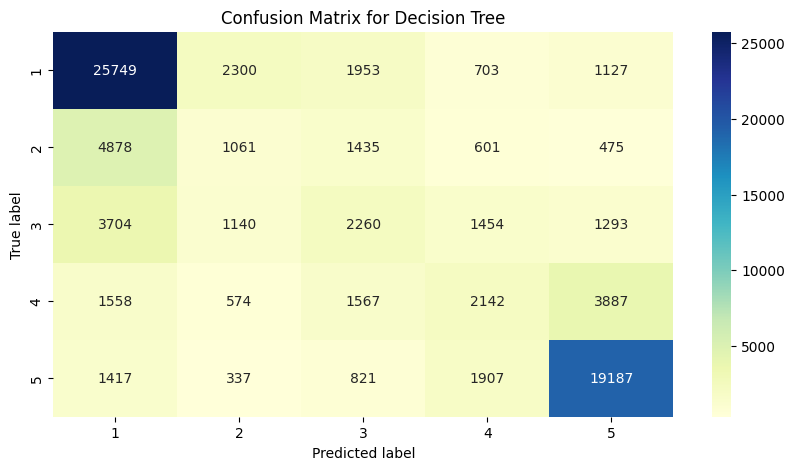

In [29]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Decision Tree')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr=lr.fit(X_train, Y_train)
score = lr.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.6561594636657488


In [31]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = lr.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.6561594636657488

 Clasification report:
               precision    recall  f1-score   support

           1     0.6880    0.9150    0.7854     31832
           2     0.2703    0.0521    0.0873      8450
           3     0.3591    0.2093    0.2645      9851
           4     0.3890    0.2085    0.2714      9728
           5     0.7394    0.8937    0.8093     23669

    accuracy                         0.6562     83530
   macro avg     0.4891    0.4557    0.4436     83530
weighted avg     0.5867    0.6562    0.6002     83530



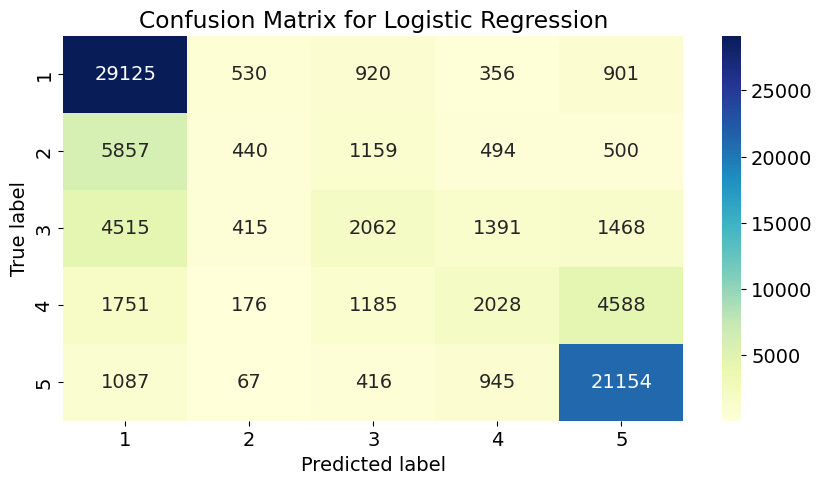

In [32]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Logistic Regression')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
 
rf= RandomForestClassifier( max_depth=60, random_state=42)
rf = rf.fit(X_train, Y_train)
score = rf.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.6173710044295463


In [34]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = rf.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.6173710044295463

 Clasification report:
               precision    recall  f1-score   support

           1     0.5978    0.9370    0.7300     31832
           2     0.2000    0.0001    0.0002      8450
           3     0.4720    0.0222    0.0425      9851
           4     0.4635    0.0841    0.1423      9728
           5     0.6593    0.8747    0.7519     23669

    accuracy                         0.6174     83530
   macro avg     0.4785    0.3836    0.3334     83530
weighted avg     0.5445    0.6174    0.5128     83530



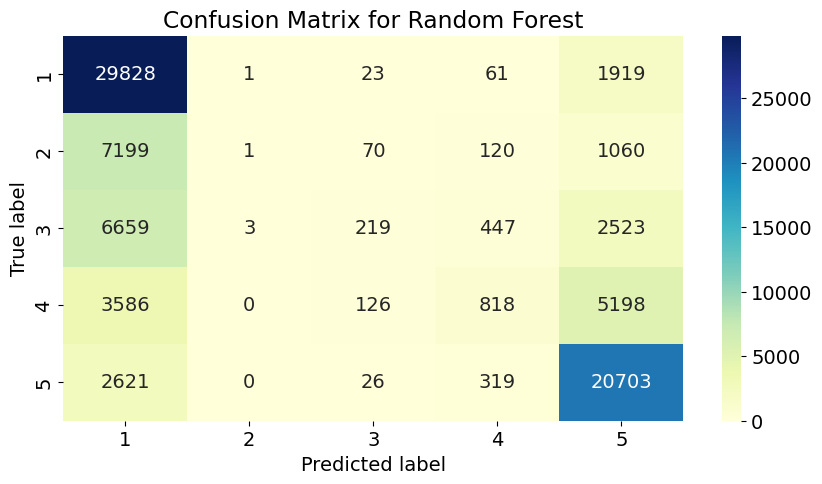

In [35]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Random Forest')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# SVM

In [36]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
svm = LinearSVC()
sv= CalibratedClassifierCV(svm) 
sv = sv.fit(X_train, Y_train)  
score =sv.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.6502214773135401


In [37]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = sv.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.6502214773135401

 Clasification report:
               precision    recall  f1-score   support

           1     0.6607    0.9326    0.7735     31832
           2     0.2350    0.0218    0.0399      8450
           3     0.3730    0.1480    0.2119      9851
           4     0.3796    0.1947    0.2574      9728
           5     0.7293    0.8910    0.8021     23669

    accuracy                         0.6502     83530
   macro avg     0.4755    0.4376    0.4169     83530
weighted avg     0.5704    0.6502    0.5810     83530



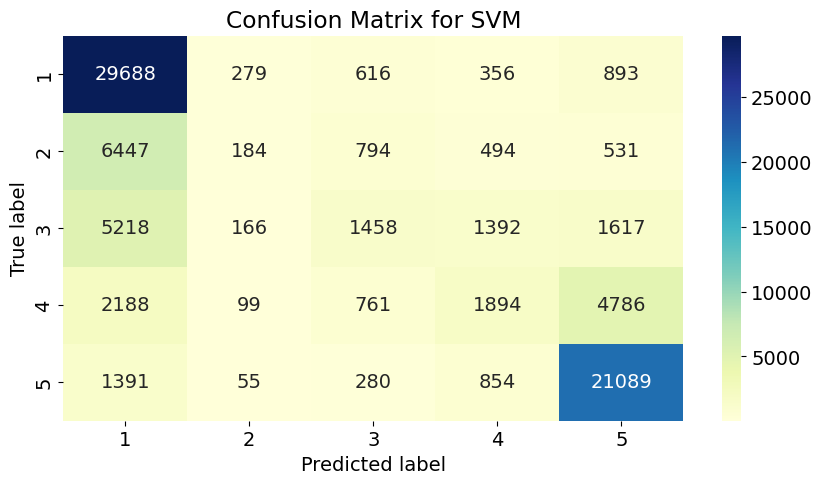

In [38]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for SVM')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Naive Bayes

In [39]:
from sklearn import model_selection, naive_bayes, svm
nb = naive_bayes.MultinomialNB(alpha=0.1)
nb = nb.fit(X_train, Y_train) 
score = nb.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.6223751945408835


In [40]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = nb.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.6223751945408835

 Clasification report:
               precision    recall  f1-score   support

           1     0.7293    0.7926    0.7596     31832
           2     0.2441    0.1482    0.1844      8450
           3     0.3051    0.2811    0.2926      9851
           4     0.3326    0.2892    0.3094      9728
           5     0.7583    0.8417    0.7978     23669

    accuracy                         0.6224     83530
   macro avg     0.4739    0.4705    0.4688     83530
weighted avg     0.5922    0.6224    0.6048     83530



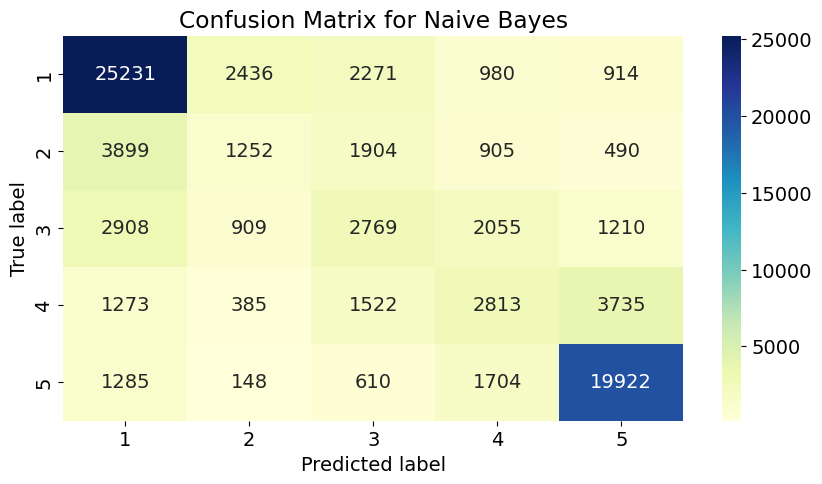

In [41]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Naive Bayes')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# XGBClassifier

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [43]:
import xgboost as xgb
model = xgb.XGBClassifier()

#Training the model on the training data
xg=model.fit(X_train, Y_train) 
score = xg.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.6418651981324075


In [44]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = xg.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.6418651981324075

 Clasification report:
               precision    recall  f1-score   support

           0     0.6325    0.9501    0.7594     31832
           1     0.2887    0.0265    0.0486      8450
           2     0.3888    0.1496    0.2161      9851
           3     0.3986    0.2129    0.2775      9728
           4     0.7554    0.8282    0.7901     23669

    accuracy                         0.6419     83530
   macro avg     0.4928    0.4335    0.4183     83530
weighted avg     0.5766    0.6419    0.5760     83530



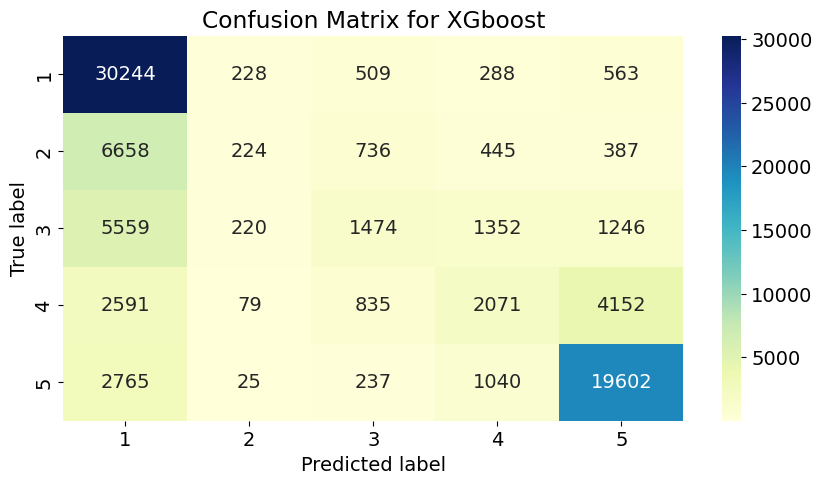

In [45]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for XGboost')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# KNN classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors=10)
knn=model.fit(X_train, Y_train) 
score = knn.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.600670417813959


In [47]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = knn.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y,digits=4))

Accuracy: 0.600670417813959

 Clasification report:
               precision    recall  f1-score   support

           0     0.6781    0.8057    0.7364     31832
           1     0.2167    0.0864    0.1235      8450
           2     0.3006    0.2153    0.2509      9851
           3     0.3183    0.1613    0.2141      9728
           4     0.6624    0.8495    0.7444     23669

    accuracy                         0.6007     83530
   macro avg     0.4352    0.4236    0.4139     83530
weighted avg     0.5406    0.6007    0.5586     83530



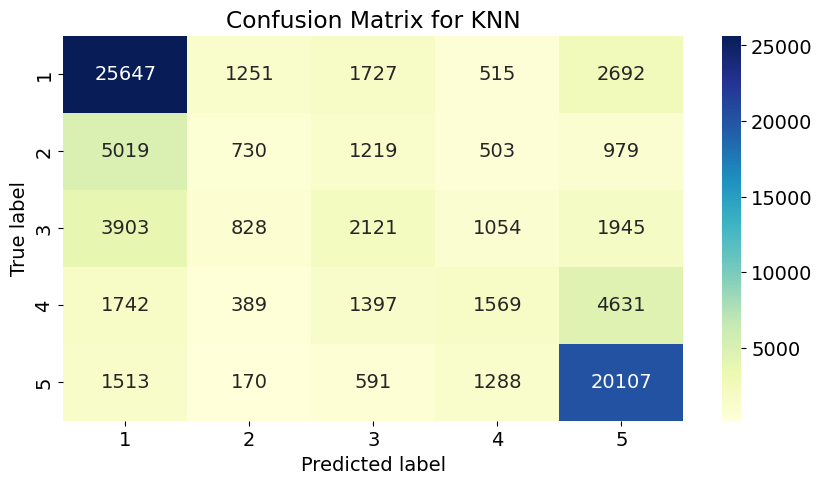

In [48]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3,4,5])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for KNN')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()